In [1]:
from PIL import Image, ImageSequence
import vidaug.augmentors as va

In [93]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

cwd = os.getcwd()
path = os.path.join(cwd,'datasets')
jap = os.path.join(path,'jap')
vid1 = os.listdir(jap)[30]


vid1

'37.avi'

In [6]:
def map_funcs(obj, func_list):
    return [func(obj) for func in func_list]

aug_func = [hflip,inv_color,add,affine,blur,translate,shear,salt,pepper]
test1 = map_funcs(even_frames,aug_func)

print(len(test1))
print(len(test1[0]))
# print(type(test1[0]))


NameError: name 'even_frames' is not defined

In [469]:
# for i in range(0,len(test1[1])):
#     plt.imshow(test1[1][i])
#     plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
#     plt.xlabel(i)
#     plt.show()

In [4]:
def vid_loader(path,showimg=False):
    frames = []
    cap = cv2.VideoCapture(path)
    fps = cap.get(cv2.CAP_PROP_FPS) 
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#     print('number of frames = ' + str(frame_count))

    for k in range(int(frame_count)):
        ret, frame = cap.read()
        frame=cv2.resize(frame,(128,128),interpolation=cv2.INTER_AREA)
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        if showimg:
            plt.imshow(gray)
            plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
            plt.show()
        frames.append(rgb)
    return np.array(frames)

def crop_vid(np_vid,framecnt):
    crop = va.TemporalCenterCrop(framecnt)
    return crop(np_vid)

def map_funcs(obj, func_list):
    return [func(obj) for func in func_list]

# sometimes = lambda aug: va.Sometimes(1, aug)
hflip = va.HorizontalFlip() # horizontally flip the video with 100% probability
inv_color = va.InvertColor()
add = va.Add(-100)
affine = va.PiecewiseAffineTransform(5,21,5)
blur = va.GaussianBlur(1)
translate = va.RandomTranslate(20,20)
shear = va.RandomShear(0.2,0.2)
salt = va.Salt(30)
pepper = va.Pepper(30)

aug_func = [hflip,inv_color,add,affine,blur,translate,shear,salt,pepper]


In [8]:
import os
import cv2

X_tr = []
label = []
img_rows,img_cols,img_depth=128,128,24

ds_path = 'datasets'
# folders = os.listdir(ds_path)
folders = ['jap']#,'hook','uppercut','none']
class_num = 0

for sub in folders:
    
    ls_path = os.path.join(ds_path,sub)
    listing = sorted(os.listdir(ls_path))
    
    for vid in listing:
        all_from_one = []
        vid_ls_path = os.path.join(ls_path,vid)
        vid_np = vid_loader(vid_ls_path)
        print(vid+' loaded to np array')
        print(vid+' has ' + str(len(vid_np)) + ' frames')
        
        # first crop to 48 frames
        vid_48 = crop_vid(vid_np,48)

        # split 3 ways
        center_frames = crop_vid(vid_48,24)
        # perform 9 augmentation to even_frames => length:9 x 24frame
        all_from_one.append(map_funcs(center_frames,aug_func))
        
        even_frames = vid_48[::2] 
        all_from_one.append(map_funcs(even_frames,aug_func))
        
        odd_frames = vid_48[1::2]
        all_from_one.append(map_funcs(odd_frames,aug_func))
        
        
        for aug_vids in all_from_one:
            for aug in aug_vids:
                input_img = np.array(aug)
                ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
                ipt=np.rollaxis(ipt,2,0)
                X_tr.append(ipt)
                label.append(class_num)
        
    class_num+=1

#     X_tr_array = np.array(X_tr)   # convert the frames read into array
#     # print (ipt.shape)
    num_samples = len(X_tr) 
    print (num_samples)

1.avi loaded to np array
1.avi has 56 frames
10.avi loaded to np array
10.avi has 55 frames
11.avi loaded to np array
11.avi has 55 frames
12.avi loaded to np array
12.avi has 55 frames
13.avi loaded to np array
13.avi has 56 frames
14.avi loaded to np array
14.avi has 56 frames
15.avi loaded to np array
15.avi has 56 frames
16.avi loaded to np array
16.avi has 55 frames
17.avi loaded to np array
17.avi has 55 frames
18.avi loaded to np array
18.avi has 55 frames
19.avi loaded to np array
19.avi has 55 frames
2.avi loaded to np array
2.avi has 55 frames
20.avi loaded to np array
20.avi has 55 frames
21.avi loaded to np array
21.avi has 55 frames
22.avi loaded to np array
22.avi has 55 frames
23.avi loaded to np array
23.avi has 56 frames
24.avi loaded to np array
24.avi has 55 frames
25.avi loaded to np array
25.avi has 56 frames
26.avi loaded to np array
26.avi has 55 frames
27.avi loaded to np array
27.avi has 55 frames
28.avi loaded to np array
28.avi has 55 frames
29.avi loaded to 

KeyboardInterrupt: 

In [499]:
print(ipt.shape)

(24, 128, 128, 3)


In [94]:
jap1 = vid_loader(os.path.join(jap,vid1))

In [6]:
# first crop to 48 frames
crop_jap1 = crop_vid(jap1,48)

# split 3 ways
# center_frames = crop_vid(crop_jap1,24)
# even_frames = crop_jap1[::2] 
# odd_frames = crop_jap1[1::2]

In [7]:
crop_jap1.shape

(48, 128, 128, 3)

In [387]:
len(center_frames)

24

In [ ]:
# for each center_frames -> pass to 9 types of augmentation and append to x_tr + label

In [56]:
# sometimes = lambda aug: va.Sometimes(1, aug)
hflip = va.HorizontalFlip() # horizontally flip the video with 100% probability
inv_color = va.InvertColor()
add = va.Add(-100)
affine = va.PiecewiseAffineTransform(5,21,5)
blur = va.GaussianBlur(1)
translate = va.RandomTranslate(20,20)
shear = va.RandomShear(0.2,0.2)
salt = va.Salt(30)
pepper = va.Pepper(30)

In [57]:
video_flip = hflip(jap1)
video_inv = inv_color(jap1)
video_add = add(jap1)
video_affine = affine(jap1)
video_blur = blur(jap1)
video_tranform = translate(jap1)
video_shear = shear(jap1)
video_salt = salt(jap1)
video_pepper = pepper(jap1)

In [281]:
video_flip[0].shape

(128, 128, 3)

In [395]:
print(jap1.shape)
crop_test = crop(jap1)
print(crop_test.shape)

(56, 128, 128, 3)
(48, 128, 128, 3)


In [356]:
vid[0].shape

(480, 640, 3)

In [68]:
# [hflip,inv_color,blur,translate,salt]
showcase = [jap1,video_flip,video_inv,video_blur,video_tranform,video_salt]


IndexError: too many indices for array

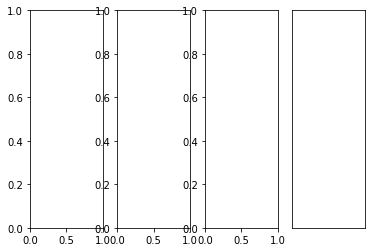

In [92]:
f, axarr = plt.subplots(1,4)
plt.xticks([]), plt.yticks([]) 
axarr[0,1].imshow(jap1[1])
axarr[0,2].imshow(jap1[2])
axarr[0,3].imshow(jap1[3])
axarr[0,4].imshow(jap1[4])

# for i in range(1,21):
#     fig.add_subplot(1,20,i)
#     plt.imshow(jap1[i])
#     plt.xticks([]), plt.yticks([]) 
#     plt.xlabel(i)
#     plt.show()

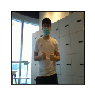

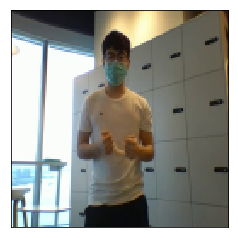

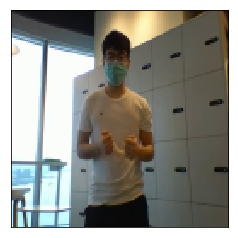

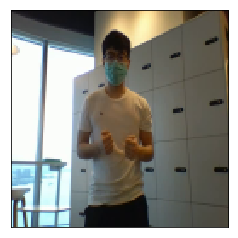

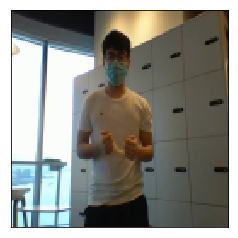

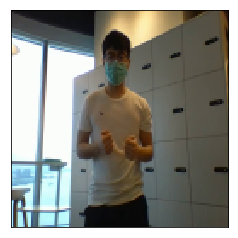

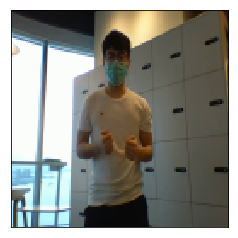

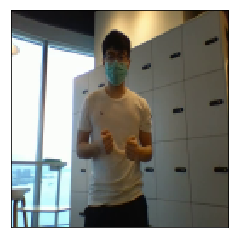

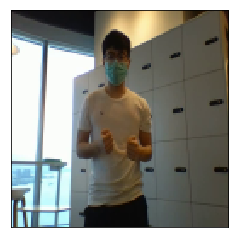

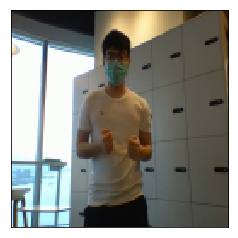

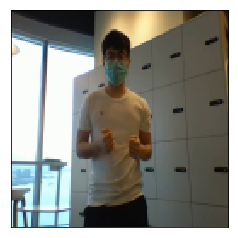

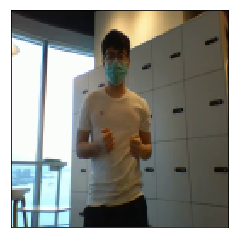

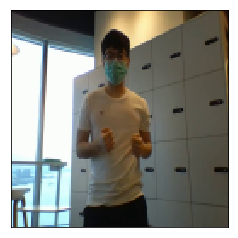

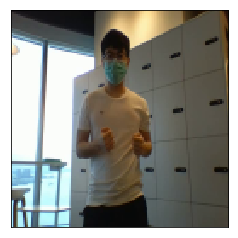

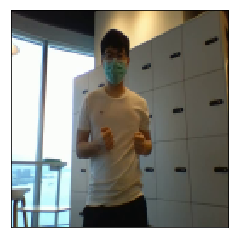

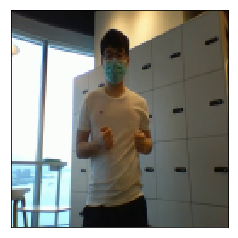

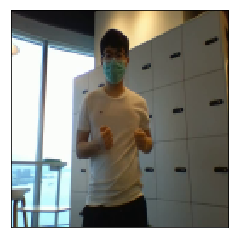

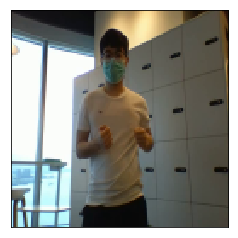

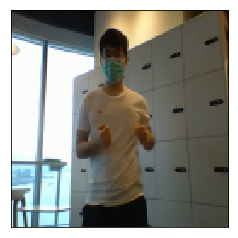

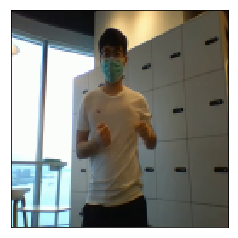

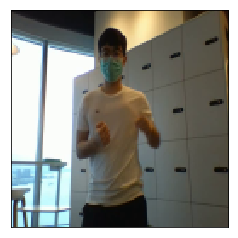

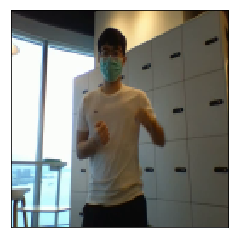

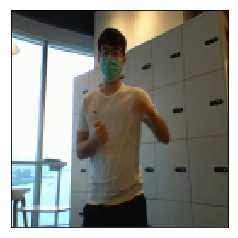

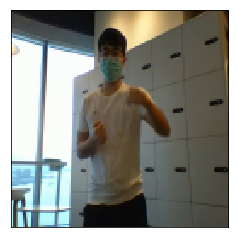

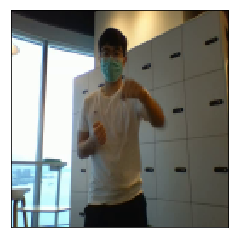

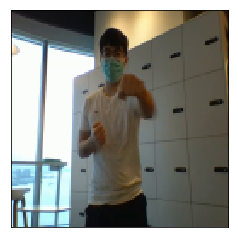

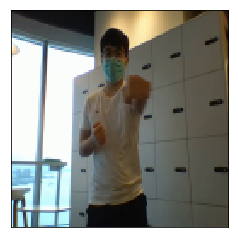

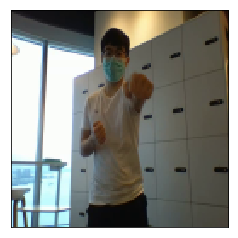

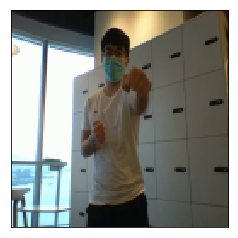

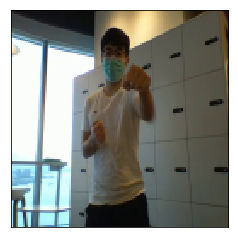

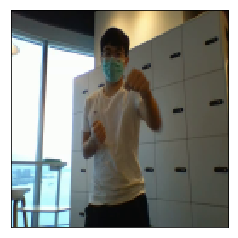

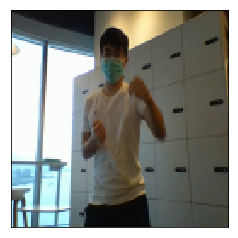

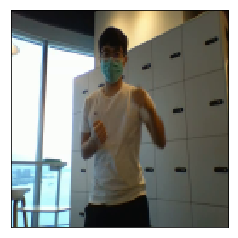

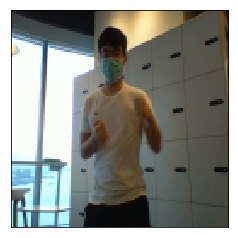

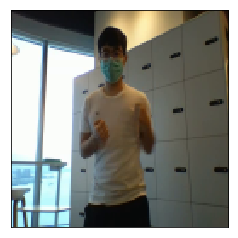

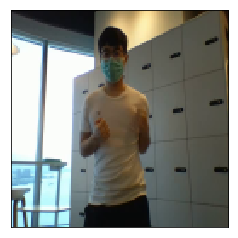

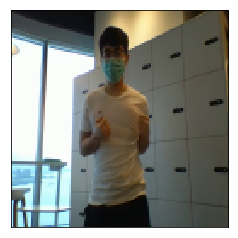

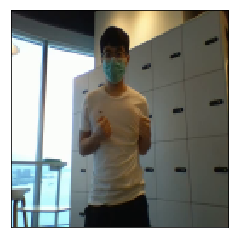

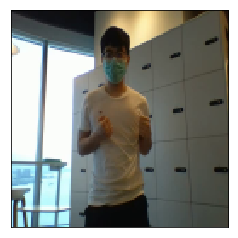

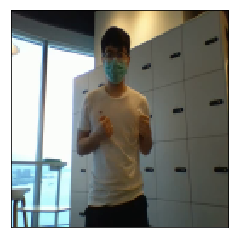

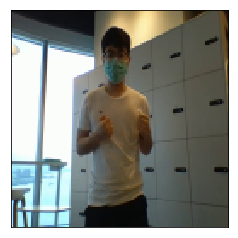

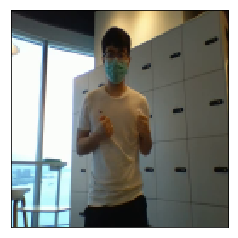

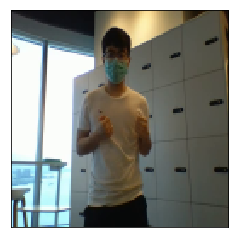

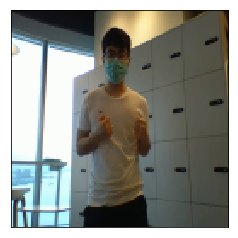

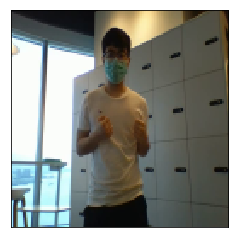

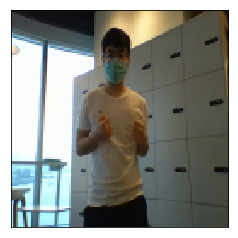

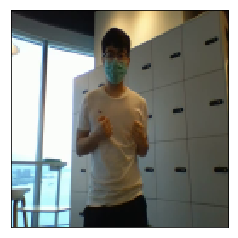

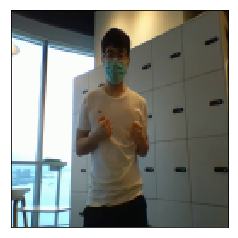

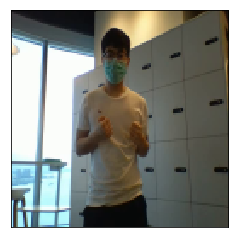

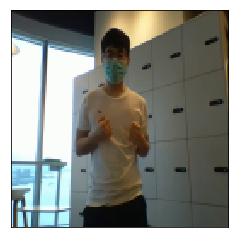

In [95]:
w=10
h=10
fig=plt.figure(figsize=(16, 16))
columns = 5
rows = 10
for i in range(1, columns*rows +1):
#     img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(jap1[i])
    plt.xticks([]), plt.yticks([]) 
    plt.show()

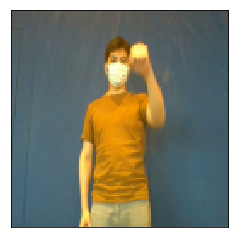

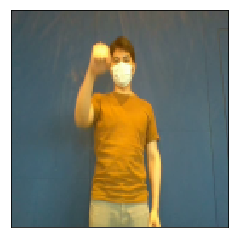

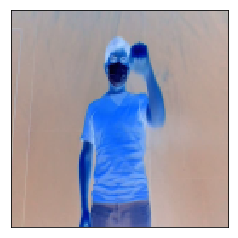

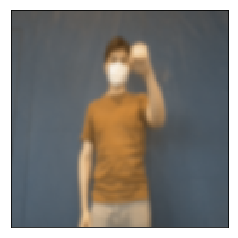

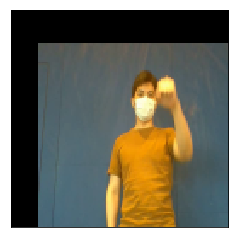

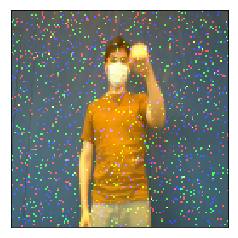

In [69]:
for k in showcase:
    plt.imshow(k[45])
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
#     plt.xlabel(i)
    plt.show()

In [ ]:
# save augmentad frames as gif 
video_aug[0].save("out.gif", save_all=True, append_images=video_aug[1:], duration=100, loop=0)
